I am numerically solving equations (21-24) using Runge-Kutta-4. I have assumed that

$$\hbar = \mu = e = 1$$

which I hope is okay. 

First let's run the following functions:

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt;
%matplotlib notebook
import numpy as np;


#hbar = e = m = 1 so that Omega = B/2

def getBLinear(intercept, slope):
   B = np.zeros(2*steps)
   Bdash = slope*np.ones(2*steps)
   for i in range(2*steps):
      B[i] = intercept + slope*z[i]
   return [B, Bdash]

def getBGlazer(B0, a):
   B = np.zeros(2*steps)
   Bdash = np.zeros(2*steps)
   for i in range(2*steps):
      denominator = 1 + ((z[i] - 5)/a)**2
      B[i] = B0/denominator
      Bdash[i] = -(B0/denominator**2)*(2*(z[i]-5)/(a**2))
   return [B, Bdash]

def getInit(B, a, c):
   Tinit = abs(B)*(a + 0.5)
   Rinit = 2*(a + c + 1)/abs(B)
   Linit = 2*a + 1
   Ginit = 0
   return np.array([Tinit, Rinit, Linit, Ginit])

def calculateF(i, Yvector):
   #use index on YMatrix but 2*index on z
   f = np.zeros([4,4])
   f[0,2] = Bdash[i]/2
   f[1,3] = 2/k
   f[2,1] = Bdash[i]/2
   f[2,3] = B[i]/k
   f[3,0] = 2/k
   f[3,2] = -B[i]/k
   return np.dot(f, Yvector)

def rungeKutta():
   for i in range(steps-1):
      k1 = 2*hBy2*calculateF(2*i, YMatrix[i])
      k2 = 2*hBy2*calculateF(2*i + 1, YMatrix[i] + 0.5*k1)
      k3 = 2*hBy2*calculateF(2*i + 1, YMatrix[i] + 0.5*k2)
      k4 = 2*hBy2*calculateF(2*i + 2, YMatrix[i] + k3)
      YMatrix[i+1] = YMatrix[i] + (k1 + 2*k2 + 2*k3 + k4)/6

def plot(i, c, YMatrix):
   axs[0].plot(zplot,YMatrix[:,0],'--r'+c, label='Kinetic energy'+str(i) );
   axs[0].plot(zplot,YMatrix[:,1], '--b'+c, label='Rho squared'+str(i));
   axs[0].plot(zplot,YMatrix[:,2], '--g' + c,label='Curly L'+str(i));
   axs[0].plot(zplot,YMatrix[:,3], '--y'+c,label='G_perp'+str(i));
   axs[0].legend()
   Lz = YMatrix[:,2] - Bplot*YMatrix[:,1]/2
   axs[1].plot(zplot,Lz, '-k'+c, label='Lz');
   axs[1].legend()

def plotB():
   Bplot = np.zeros(steps)
   for i in range(steps):
      Bplot[i] = B[2*i]
   axs[0].plot(zplot,Bplot, 'black', label='Magnetic field');
   axs[0].set(xlabel='z', ylabel='Value')
   axs[0].grid(True)
   axs[0].legend()
   axs[1].set(xlabel='z', ylabel='Value')
   axs[1].grid(True)
   return Bplot

Now we are ready to test different initial conditions and magnetic fields. 

To change programming parameters change only the stuff that has a heading with triple quotes. I hope from the examples it becomes clear how one can test different values.

<h2>Example 1 - Linear field and initial conditions specified using LG mode<h2>

<IPython.core.display.Javascript object>


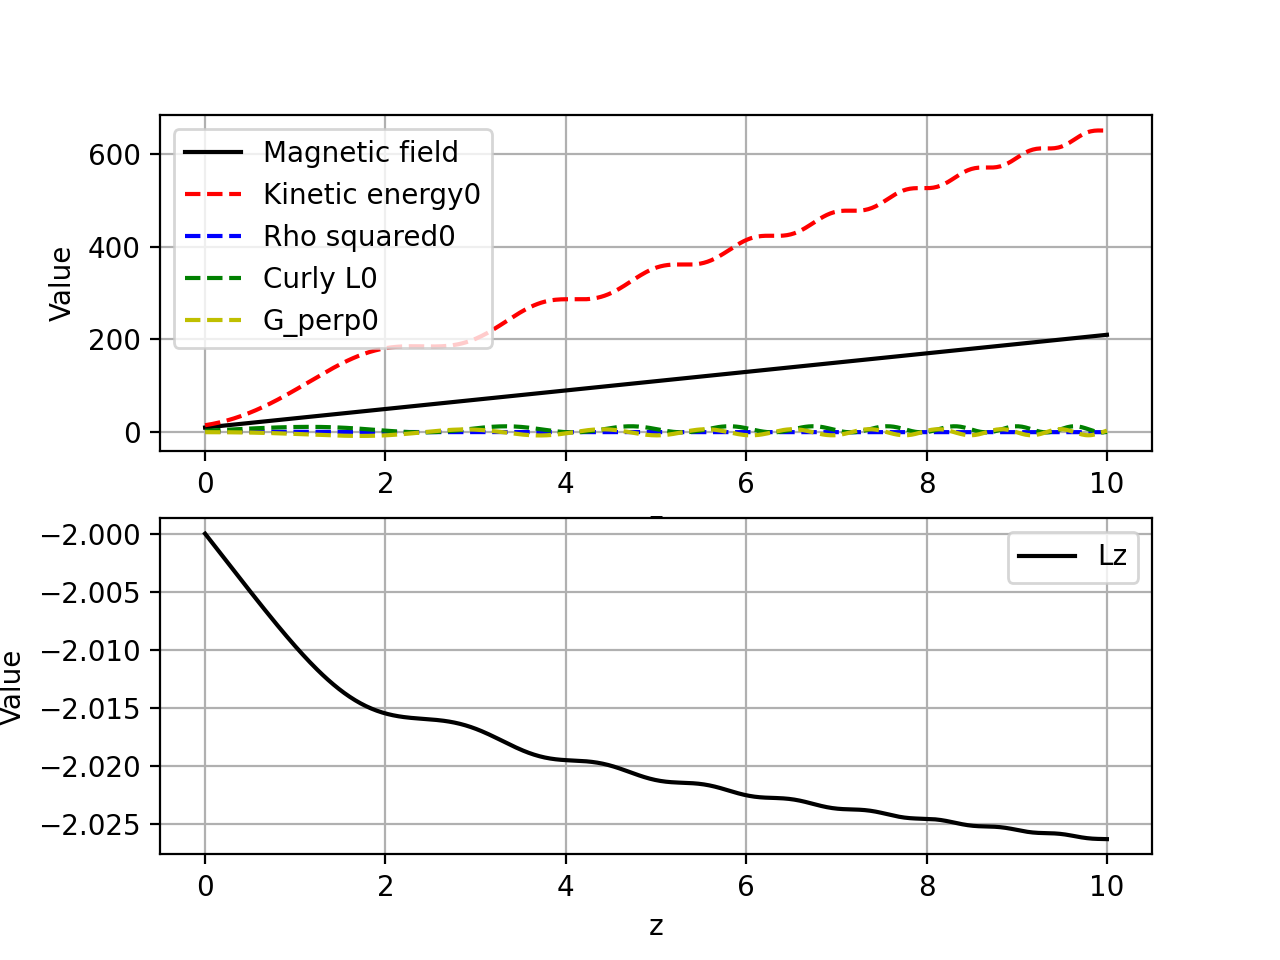

In [2]:
#from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('png', 'pdf')
"""Decrease hBy2 to increase numerical precision."""
hBy2 = 0.01; 
"""Set values of start and end of z-axis"""
zInitial = 0 
zFinal = 10

#Ignore these three steps:
#The number of steps for evaluation of \vec y is half of that used for description of Omega
steps = int( 0.5*(zFinal - zInitial)/hBy2)
z = np.linspace(zInitial, zFinal, 2*steps)
zplot = np.linspace(zInitial, zFinal, steps)

"""Define the magnetic field using getBLinear(intercept, slope) or getBGlazer(B0, a). 
The Glazer field is always centered at z=5 by default."""
[B, Bdash] = getBLinear(10, 20)


#Plot the magnetic field, etc.
fig, axs = plt.subplots(2)
Bplot = plotB();

YMatrix = np.zeros([ steps, 4])
"""The initial values can be specified by specifying the a and c quantum number and the magnetic field
at the beginning of the simulation"""
YMatrix[0] = getInit(B[0], a = 1, c = 3)
"""Set the momentum of the electron"""
k=20
rungeKutta()
plot(0, '', YMatrix)


<h2>Example 2 - Glazer field and initial conditions specified by fiat</h2>

<IPython.core.display.Javascript object>


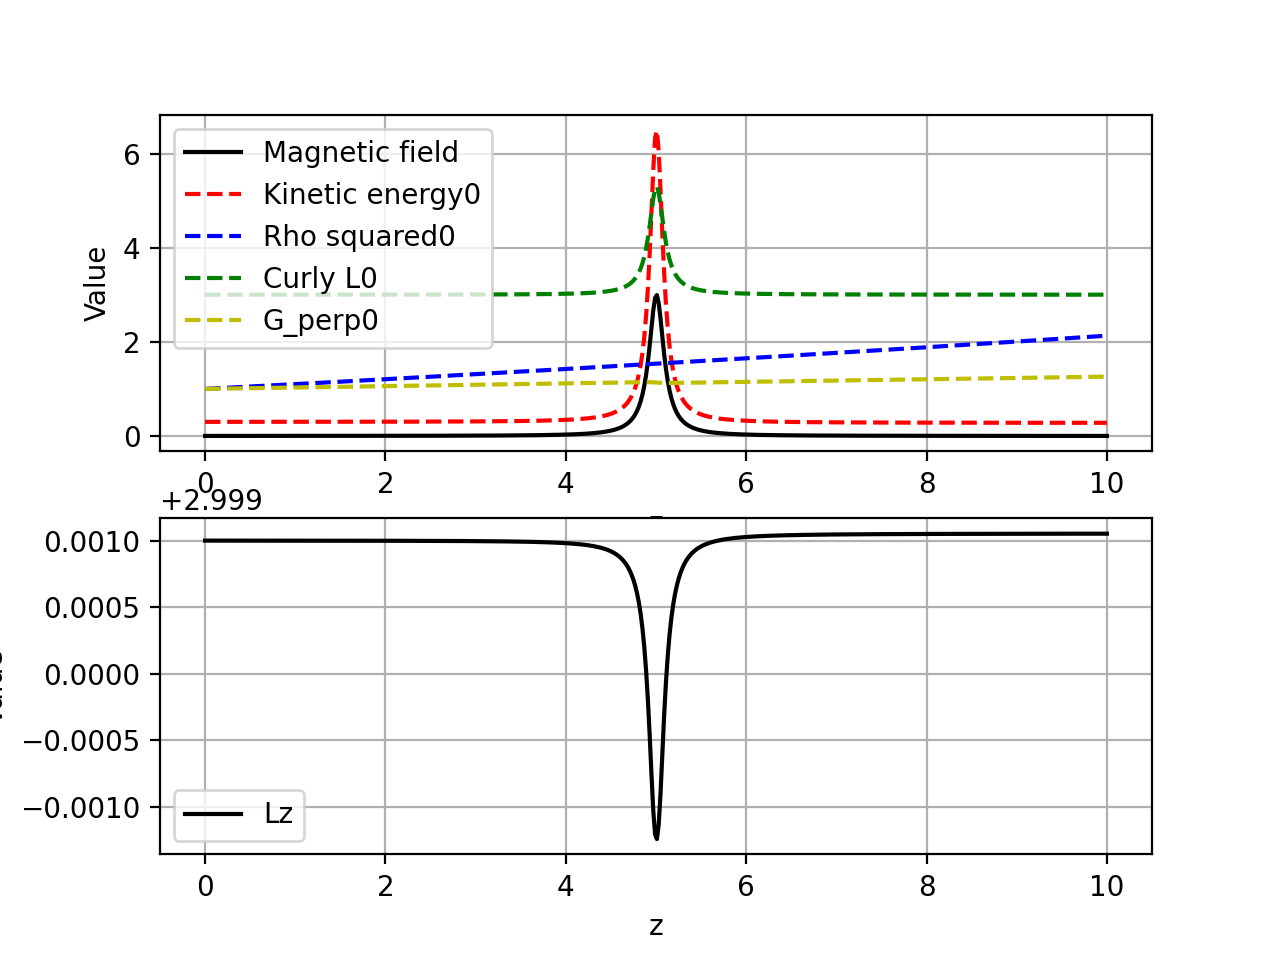

In [3]:
#from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('png', 'pdf')
"""Decrease hBy2 to increase numerical precision."""
hBy2 = 0.01; 
"""Set values of start and end of z-axis"""
zInitial = 0 
zFinal = 10

#Ignore these three steps:
#The number of steps for evaluation of \vec y is half of that used for description of Omega
steps = int( 0.5*(zFinal - zInitial)/hBy2)
z = np.linspace(zInitial, zFinal, 2*steps)
zplot = np.linspace(zInitial, zFinal, steps)

"""Define the magnetic field using getBLinear(intercept, slope) or getBGlazer(B0, a). 
The Glazer field is always centered at z=5 by default."""

[B, Bdash] = getBGlazer(3, 0.1)


#Plot the magnetic field, etc.
fig, axs = plt.subplots(2)
Bplot = plotB();

T_perp0 = 0.3
RhoSquared0 = 1
L_z = 3
CurlyL0 = 0.5*RhoSquared0*B[0] + L_z
G_perp0 = 1

YMatrix = np.zeros([ steps, 4])
"""The initial values can also be specified by fiat. Keep the line of code for CurlyL0 as it is though."""
YMatrix[0] = np.array([T_perp0, RhoSquared0, CurlyL0, G_perp0])
"""Set the momentum of the electron"""
k=20
rungeKutta()
plot(0, '', YMatrix)

In [4]:
import matplotlib
matplotlib.__version__

'3.2.1'